In [1]:
import psycopg2
import pandas as pd
import sh
from IPython.display import display, HTML, Javascript
from shapely import wkt
from geopandas import GeoDataFrame as gdf


parcels = psycopg2.connect('service=parcels')

In [2]:
cur = parcels.cursor()
cur.execute("DROP VIEW IF EXISTS parcel_risk_temp")
parcels.commit()
cur.execute("create materialized view parcel_risk_temp AS select p.*, r.risk_category as parcel_risk_category from parcels p LEFT JOIN parcel_risk_category r ON p.parcel_id = r.parcel_id WHERE p.cnty_code='055' and p.state='CA';")
parcels.commit()

In [2]:
df1 = gdf.from_postgis("""SELECT * FROM parcel_risk_temp;""", con=parcels, geom_col='wkb_geometry')
cur.execute("DROP VIEW IF EXISTS parcel_risk_temp")
parcels.commit()
df1

,ogc_fid,wkb_geometry,parcel_id,state_code,cnty_code,apn,apn2,addr,city,state,...,condition,constr_typ,ext_walls,quality,story_nbr,bld_units,units_nbr,risk_category,risk_data,parcel_risk_category
0,1288,"MULTIPOLYGON (((-122.26282 38.46903, -122.2625...",787241437.0,06,055,032020019000,None,None,NAPA,CA,...,None,None,None,None,NaN,NaN,NaN,None,None,Low
1,438,"MULTIPOLYGON (((-122.40115 38.40973, -122.4011...",787240402.0,06,055,027490012000,None,None,NAPA,CA,...,None,None,None,None,NaN,NaN,NaN,None,None,Low
2,1620,"MULTIPOLYGON (((-122.21655 38.40798, -122.2167...",787241748.0,06,055,032160050000,None,None,NAPA,CA,...,None,None,None,None,NaN,NaN,NaN,None,None,Low
3,1621,"MULTIPOLYGON (((-122.21545 38.40801, -122.2156...",787241749.0,06,055,032160051000,None,None,NAPA,CA,...,None,None,None,None,NaN,NaN,NaN,None,None,Low
4,1289,"MULTIPOLYGON (((-122.25350 38.47617, -122.2533...",787241438.0,06,055,032020021000,None,None,NAPA,CA,...,None,None,None,None,NaN,NaN,NaN,None,None,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49867,14287,"MULTIPOLYGON (((-122.30163 38.27868, -122.3016...",787254013.0,06,055,043062004000,None,1130 FOSTER RD,NAPA,CA,...,None,None,None,None,NaN,NaN,NaN,high,"{'city': 'Napa', 'geom': '0101000020E610000034...",High
49868,21550,"MULTIPOLYGON (((-122.25646 38.33505, -122.2557...",787261580.0,06,055,049100009000,None,3261 VICHY AVE,NAPA,CA,...,None,None,None,None,NaN,NaN,NaN,high,"{'city': 'Napa', 'geom': '0101000020E6100000E4...",High
49869,19749,"MULTIPOLYGON (((-122.46304 38.50334, -122.4629...",787260114.0,06,055,009090046000,None,957 BROWN ST,SAINT HELENA,CA,...,None,None,None,None,NaN,NaN,NaN,high,"{'city': 'Saint Helena', 'geom': '0101000020E6...",High
49870,40631,"MULTIPOLYGON (((-122.30450 38.29899, -122.3043...",787279733.0,06,055,004680003000,None,2700 KILBURN AVE,NAPA,CA,...,None,None,None,None,NaN,NaN,NaN,high,"{'city': 'Napa', 'geom': '0101000020E610000098...",High


In [3]:
df_2 = df1.drop(['risk_category'], axis=1)
df_3 = df_2.rename(columns={'parcel_risk_category': 'risk_category'})
df_3.sort_values('parcel_id', inplace=True)
df_3.reset_index()
df_3

,ogc_fid,wkb_geometry,parcel_id,state_code,cnty_code,apn,apn2,addr,city,state,...,bld_imp_cd,condition,constr_typ,ext_walls,quality,story_nbr,bld_units,units_nbr,risk_data,risk_category
355,318,"MULTIPOLYGON (((-122.26191 38.22491, -122.2617...",787240207.0,06,055,057310006000,None,None,NAPA,CA,...,None,None,WOO,None,QGO,NaN,1.0,NaN,None,Medium
356,319,"MULTIPOLYGON (((-122.27184 38.24969, -122.2718...",787240208.0,06,055,046740003000,None,855 BORDEAUX WAY #130,NAPA,CA,...,None,None,None,None,None,NaN,1.0,8.0,None,Medium
357,320,"MULTIPOLYGON (((-122.28289 38.32088, -122.2828...",787240209.0,06,055,044370017000,None,3022 SOSCOL AVE,NAPA,CA,...,None,None,WOO,None,QAV,NaN,1.0,NaN,None,Medium
309,321,"MULTIPOLYGON (((-122.47321 38.50135, -122.4733...",787240210.0,06,055,009312005000,None,None,SAINT HELENA,CA,...,None,None,None,None,None,NaN,NaN,NaN,None,Low
358,322,"MULTIPOLYGON (((-122.46332 38.40813, -122.4632...",787240211.0,06,055,027320012000,None,None,NAPA,CA,...,None,None,None,None,None,NaN,NaN,NaN,None,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49757,49834,"MULTIPOLYGON (((-122.33618 38.37525, -122.3368...",787290074.0,06,055,036130041000,None,5446 TRUBODY RD,NAPA,CA,...,None,None,None,None,None,NaN,NaN,NaN,None,None
49758,49835,"MULTIPOLYGON (((-122.33645 38.38008, -122.3353...",787290075.0,06,055,036130047000,None,None,NAPA,CA,...,None,None,None,None,None,NaN,NaN,NaN,None,None
49759,49836,"MULTIPOLYGON (((-122.33425 38.37588, -122.3361...",787290076.0,06,055,036130048000,None,None,NAPA,CA,...,None,None,None,None,None,NaN,NaN,NaN,None,None
49760,49837,"MULTIPOLYGON (((-122.46066 38.50915, -122.4596...",787290077.0,06,055,009552002000,None,576 POPE ST,SAINT HELENA,CA,...,None,None,None,None,None,NaN,NaN,NaN,None,Low


<IPython.core.display.Javascript object>


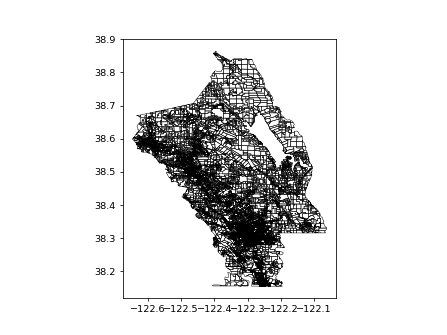

In [5]:
import matplotlib.pyplot as plt
import geopandas
%matplotlib notebook

fig, ax = plt.subplots(1, 1)

df_3.geometry.boundary.plot(color=None, edgecolor='k', linewidth=0.5, ax=ax)



plt.show()

In [6]:
df_3.to_file('parcel-risk.shp')